<a href="https://colab.research.google.com/github/gonzaloelejalde/piii-2025/blob/main/clase07/clase07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Codigo de Pulsacion/Beats

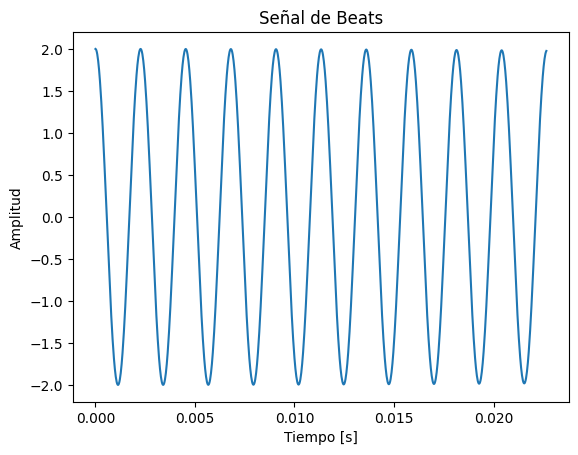

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

def generate_beats(freq1, freq2, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal1 = np.cos(2 * np.pi * freq1 * t)
    signal2 = np.cos(2 * np.pi * freq2 * t)
    beats = signal1 + signal2
    return t, beats

# Parámetros
freq1 = 440  # Frecuencia del primer tono en Hz (Nota La)
freq2 = 442  # Frecuencia del segundo tono en Hz
duration = 5.0  # Duración de la señal en segundos
sample_rate = 44100  # Tasa de muestreo

# Generar la señal de beats
t, beats_signal = generate_beats(freq1, freq2, duration, sample_rate)

# Visualizar la señal de beats
plt.plot(t[:1000], beats_signal[:1000])  # Visualización de un pequeño fragmento de la señal
plt.title('Señal de Beats')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

# Reproducir la señal de beats
Audio(beats_signal, rate=sample_rate)

Ejercicio 15

**¿Cuál es la fórmula para calcular la frecuencia de oscilación?**

En el caso de pulsación acustica (beats), es la diferencia entre las dos frecuencias: fbeats = |f1 - f2|

Resultado --> indica que el volumen sube y baja fbeats veces por segundo

**¿Cómo se perciben las pulsaciones cuando las frecuencias están muy cerca en comparación a cuando están más alejadas?**

Frecuencias cercanas = Frecuencia de pulsacion baja; Se escucha un solo tono (aproximadamente el promedia de f1 y f2), cuyo volumen sube y baja lentamente al ritmo de los beats; El oído humano percibe esto como un "latido acústico"

Frecuencias lejanas: La frecuencia de pulsacion sube; El volumen fluctúa tan rápido que ya no se percibe como latido, sino como un cambio en el timbre o la sensación de que son dos tonos distintos sonando al mismo tiempo; En música, esto ya no se interpreta como pulsación sino como disonancia o interferencia de dos notas cercanas

**¿Qué pasa si se multiplican? Es modulación AM? Con portadora, sin portadora, o qué? Analizarlo.**

Multiplicacion --> aparecen dos nuevas frecuencias: Suma |f1 + f2|; Diferencia |f1-f2|. Esto equivale a una modulacion AM de doble banda lateral con portadora suprimida (DSB-SC)

Si, es modulacion AM, pero en la variante DSB-SC (sin portadora)

Porque al multiplicar las señales solo aparecen las bandas laterales (suma y diferencia de frecuencias), pero no la portadora; eso define a la AM de doble banda lateral con portadora suprimida (DSB-SC).




Ejercicio 16

Filtro transmisor (Código ejemplo del profe)

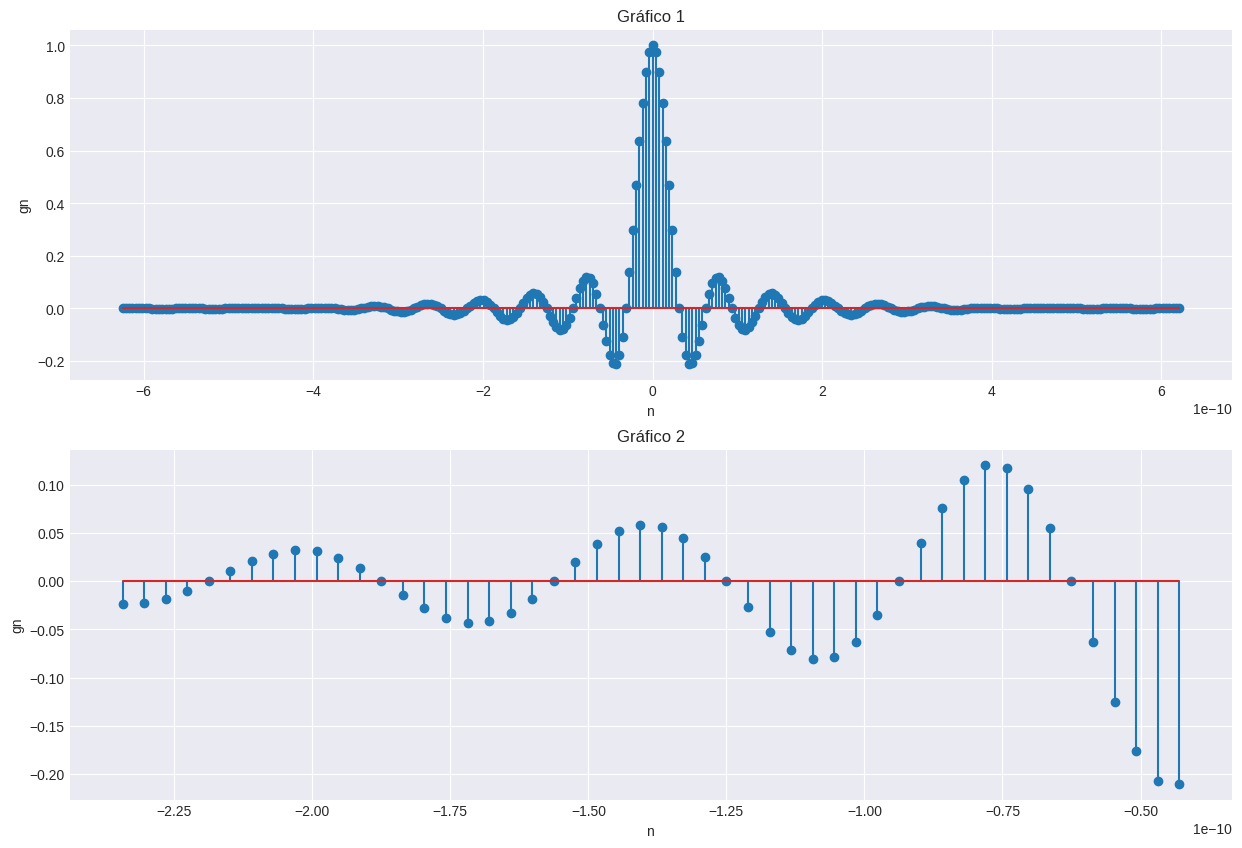

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use( 'seaborn-v0_8-darkgrid' )

# ====================
#  Generación de g[n]
# ====================

fB = 32e9    # Velocidad de simbolos (baud rate)
# Es la frecuencia de los simbolos, 32 GBaudios

T = 1 / fB   # Tiempo entre símbolos
M = 8        # Factor de sobremuestreo
fs = fB * M  # Sample rate

alpha = 0.1  # Factor de roll-off
L = 20       # ( 2 * L * M + 1 ) es el largo del filtro sobremuestreado

t = np.arange( -L, L, 1 / M ) * T

gn = np.sinc( t / T ) * np.cos( np.pi * alpha * t / T ) / ( 1 - 4 * alpha**2 * t**2 / T**2 )

fig, axs = plt.subplots( nrows = 2, ncols = 1 )
fig.set_figwidth( 15 )
fig.set_figheight( 10 )

axs[ 0 ].stem( t, gn )
axs[ 0 ].set_title( 'Gráfico 1' )
axs[ 0 ].set_xlabel( 'n' )
axs[ 0 ].set_ylabel( 'gn' )

axs[ 1 ].stem( t[ 100 : 150 ], gn[ 100 : 150 ] )
axs[ 1 ].set_title( 'Gráfico 2' )
axs[ 1 ].set_xlabel( 'n' )
axs[ 1 ].set_ylabel( 'gn' )

plt.show()

Código adornado con leyendas, ejes de coordenadas, etc

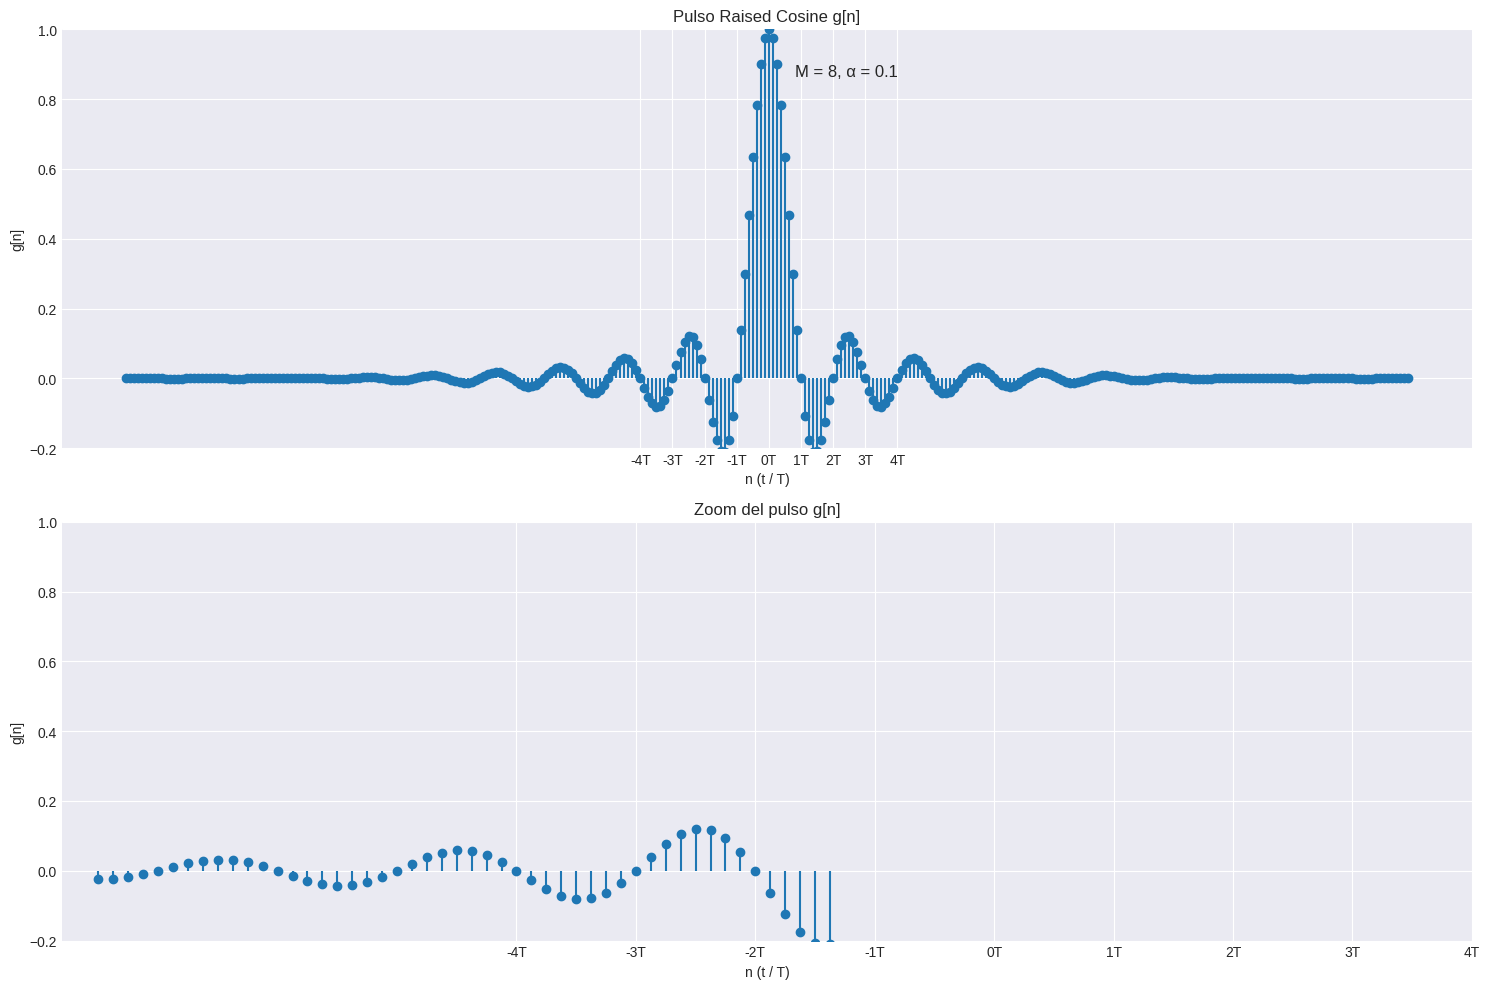

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# ====================
#  Generación de g[n]
# ====================

fB = 32e9    # Velocidad de símbolos (baud rate)
T = 1 / fB   # Tiempo entre símbolos
M = 8        # Factor de sobremuestreo
fs = fB * M  # Sample rate

alpha = 0.1  # Factor de roll-off
L = 20       # (2 * L * M + 1) es el largo del filtro sobremuestreado

t = np.arange(-L, L, 1 / M) * T

gn = np.sinc(t / T) * np.cos(np.pi * alpha * t / T) / (1 - 4 * alpha**2 * t**2 / T**2)

# ====================
#  Graficación
# ====================

fig, axs = plt.subplots(nrows=2, ncols=1)
fig.set_figwidth(15)
fig.set_figheight(10)

# --- Gráfico completo ---
axs[0].stem(t, gn, basefmt=" ")
axs[0].set_title('Pulso Raised Cosine g[n]')
axs[0].set_xlabel('n (t / T)')
axs[0].set_ylabel('g[n]')
axs[0].set_ylim(-0.2, 1)  # Amplitud de -0.2 a 1

# Ejes x con múltiplos de T
x_ticks = np.arange(-4*T, 5*T, T)  # desde -4T hasta 4T
x_labels = [f'{int(i)}T' for i in range(-4,5)]
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(x_labels)

# Anotación M y alpha más a la derecha
axs[0].text(4*T, 0.9, f'M = {M}, α = {alpha}', ha='right', va='top', fontsize=12)

# --- Zoom en zona central ---
axs[1].stem(t[100:150], gn[100:150], basefmt=" ")
axs[1].set_title('Zoom del pulso g[n]')
axs[1].set_xlabel('n (t / T)')
axs[1].set_ylabel('g[n]')
axs[1].set_ylim(-0.2, 1)
axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(x_labels)

plt.tight_layout()
plt.show()

